### Business Problem - 

The business wanted to know, which are the valuable customers by dividing them into customer segments.

#### The different steps involved are:

1. Importing and understanding data

2. Missing values treatment

3. Data transformation

4. Outlier treatment

5. Data standardisation

6. Finding the optimal value of K

7. Implementing K Means algorithm

8. Analysing the clusters of customers to obtain business insights

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [111]:
import warnings
warnings.filterwarnings("ignore")

In [112]:
retail_df = pd.read_csv("Online+Retail.csv")
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [113]:
retail_df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
102616,545027,21929,JUMBO BAG PINK VINTAGE PAISLEY,1,25-02-2011 14:59,4.96,NaN,United Kingdom
112487,545895,82494L,WOODEN FRAME ANTIQUE WHITE,1,07-03-2011 17:14,7.46,NaN,United Kingdom
8866,537154,22729,ALARM CLOCK BAKELIKE ORANGE,2,05-12-2010 13:05,3.75,15808.0,United Kingdom
215256,555651,23056,FLOWERS CHANDELIER T-LIGHT HOLDER,5,06-06-2011 14:02,6.25,17361.0,United Kingdom
122252,546856,22382,LUNCH BAG SPACEBOY DESIGN,10,17-03-2011 14:12,1.65,15433.0,United Kingdom
323826,565350,22621,TRADITIONAL KNITTING NANCY,3,02-09-2011 14:42,1.65,14178.0,United Kingdom
6667,536974,22892,SET OF SALT AND PEPPER TOADSTOOLS,12,03-12-2010 13:59,1.25,12682.0,France
408743,572025,23344,JUMBO BAG 50'S CHRISTMAS,10,20-10-2011 11:30,2.08,17651.0,United Kingdom
296721,562930,82482,WOODEN PICTURE FRAME WHITE FINISH,6,10-08-2011 16:01,2.55,14209.0,United Kingdom
229311,557026,16237,SLEEPING CAT ERASERS,30,16-06-2011 13:14,0.21,16571.0,United Kingdom


### Basics of Data Frame

In [114]:
retail_df.shape

(541909, 8)

In [115]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [116]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Cleaning the Data

In [117]:
# Checking the null values

round(100*(retail_df.isnull().sum()/len(retail_df)), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

Since, customer ID is an important field for our analysis. So, we can't drop the whole column, instead we will drop only the missing rows.

In [118]:
# Droping row having missing value

retail_df = retail_df.dropna()

In [119]:
retail_df.shape

(406829, 8)

In [120]:
retail_df["amount"] = retail_df.Quantity*retail_df.UnitPrice
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


### Preparing data for modeling

The base line for creating customer segmentation is - 
* R(Recency) - How recent the last transaction was done by the customer(i.e Number of days since last purchase)
* F(Frequency) - How frequently the customer purchase(ie. Number of transactions)
* M(Monetary) - Total amount of transaction.

### Our new data frame will look like
##### CustomerID  Recency  Frequency  Monetary

In [121]:
# Monetary/Amount and Frequency column

grouped_df = retail_df.groupby("CustomerID").agg({"amount":sum, "InvoiceNo":"count"})

grouped_df= grouped_df.reset_index()
grouped_df.columns = ["CustomerID","amount","frequency"]

grouped_df.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [122]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [123]:
retail_df.InvoiceDate = pd.to_datetime(retail_df.InvoiceDate, format="%d-%m-%Y %H:%M")

In [124]:
# Computing the max date

max_date = max(retail_df.InvoiceDate)
max_date

Timestamp('2011-12-09 12:50:00')

In [125]:
# Diff in date

retail_df["diff"] = max_date-retail_df.InvoiceDate

In [126]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [127]:
last_purchase = retail_df.groupby("CustomerID")["diff"].min()
last_purchase = last_purchase.reset_index()
last_purchase

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


In [128]:
# Merge
grouped_df = pd.merge(grouped_df, last_purchase, how="inner", on="CustomerID")

grouped_df.columns = ["CustomerID","amount","frequency","recency"]
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [129]:
grouped_df["recency"] = grouped_df.recency.dt.days
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


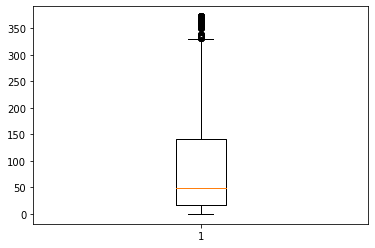

In [130]:
# 1. outlier treatment
plt.boxplot(grouped_df['recency'])
plt.show()

In [131]:
# two types of outliers:
# - statistical
# - domain specific

In [132]:
# removing (statistical) outliers
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]

### Rescaling

In [148]:
# 2. rescaling
rfm_df = grouped_df[['amount', 'frequency', 'recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [149]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


## Modelling

In [150]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [151]:
kmeans.labels_

array([1, 0, 3, ..., 1, 3, 3])

## Finding optimal number of cluster

### 1. Elbow-Curve/SSD - 
The Elbow Method is one of the most popular methods to determine this optimal value of k.
It is the sum of squared distances of data point to their closest cluster center.
For example if there are are 2 clusters

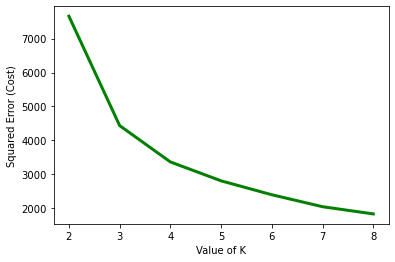

In [152]:

range_n_clusters = [2,3,4,5,6,7,8]

# Checking sum squared error(SSE)
ssd = []

for num_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=num_cluster, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
    
plt.plot(range(2,9), ssd, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show()
    

In [153]:
# Silhouette analysis

range_n_clusters = [2,3,4,5,6,7,8]
for num_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=num_cluster, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    
    print("For n_clusters= {0}, the silhouette score is= {1}".format(num_cluster, silhouette_avg))
       
    

For n_clusters= 2, the silhouette score is= 0.5415858652525395
For n_clusters= 3, the silhouette score is= 0.5084896296141937
For n_clusters= 4, the silhouette score is= 0.4811395711157807
For n_clusters= 5, the silhouette score is= 0.4662700564189704
For n_clusters= 6, the silhouette score is= 0.41753051875511704
For n_clusters= 7, the silhouette score is= 0.41592980943748625
For n_clusters= 8, the silhouette score is= 0.40958630945020674


##### From both the methods i.e the elbow curve and silhouette method, we will consider 3 as the optimal value for K.

In [154]:
# Final model with k = 3

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [155]:
kmeans.labels_

array([2, 0, 1, ..., 2, 1, 1])

In [156]:
# assign the labels

grouped_df["cluster_id"] = kmeans.labels_
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


<AxesSubplot:xlabel='cluster_id', ylabel='amount'>

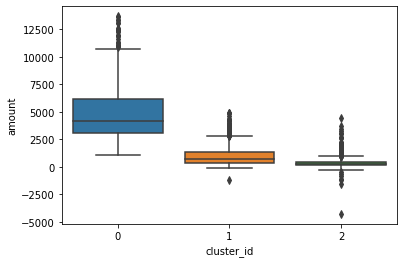

In [157]:
sns.boxplot(x="cluster_id", y="amount", data=grouped_df)

- Cluster 0 - Customer's who had spent high amount on purchase.
- Cluster 1 - Customer's who had spent average amount on purchase.
- Cluster 2 - Customer's who had spent low amount on purchase.

<AxesSubplot:xlabel='cluster_id', ylabel='frequency'>

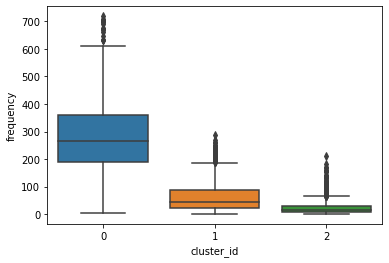

In [158]:
sns.boxplot(x="cluster_id", y="frequency", data=grouped_df)

<AxesSubplot:xlabel='cluster_id', ylabel='recency'>

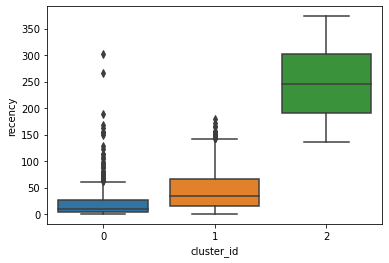

In [159]:
sns.boxplot(x="cluster_id", y="recency", data=grouped_df)

### From the above three plot, we can say that, the customers which belong to cluster 0 are the most valuable customers because of the following reasons- 

1. The have invested high amount on purchase
2. Frequency of purchase is also high
3. And the recency is also low, which means they are recent customers, the median is around 10, which means they have made the last purchase approx 10 days ago.

### Hierarchy Clustering

In [172]:
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [173]:
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


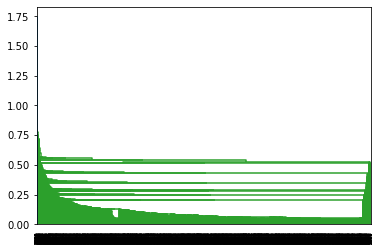

In [174]:
# creating dendogram using single linkage

clust = linkage(rfm_df_scaled, method="single", metric="euclidean")
dendrogram(clust)
plt.show()

In single linkage technique, the dendogram is not more interpretable because it consider the minimun distance between the two clusters.
So, we will go with complete linkage technique.

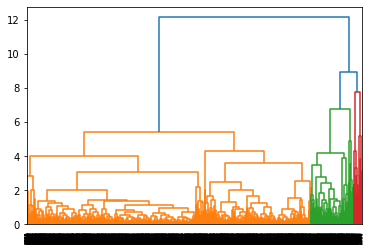

In [175]:
# creating dendogram using complete linkage

clust = linkage(rfm_df_scaled, method="complete", metric="euclidean")
dendrogram(clust)
plt.show()

In [178]:
# 3 clusters

cluster_labels = cut_tree(clust, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [179]:
# assigning cluster 

grouped_df["cluster_hierarchy"] = cluster_labels
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id,cluster_hierarchy
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,0,1
2,12348.0,1797.24,31,74,1,0
3,12349.0,1757.55,73,18,1,0
4,12350.0,334.40,17,309,2,0


<AxesSubplot:xlabel='cluster_hierarchy', ylabel='amount'>

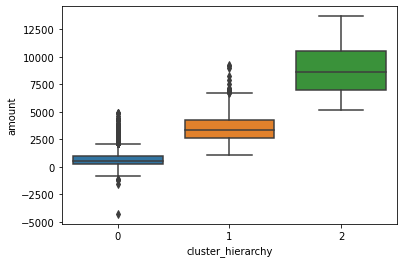

In [180]:
# Ploting 

sns.boxplot(x="cluster_hierarchy", y="amount", data=grouped_df)

<AxesSubplot:xlabel='cluster_hierarchy', ylabel='recency'>

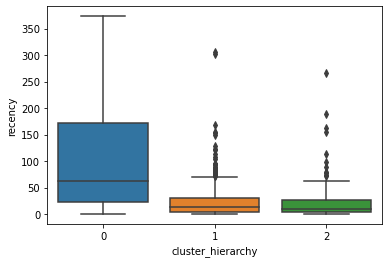

In [181]:
sns.boxplot(x="cluster_hierarchy", y="recency", data=grouped_df)

<AxesSubplot:xlabel='cluster_hierarchy', ylabel='frequency'>

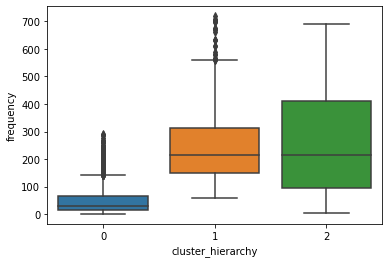

In [182]:
sns.boxplot(x="cluster_hierarchy", y="frequency", data=grouped_df)

So, most of the time, when there is large set of data we use K-Mean clustering and when the size of data is less, we use hierarchical clustering.